<a href="https://colab.research.google.com/github/MaisaLauriane/tecprog1_Maisa_Santos/blob/main/Projeto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importação do dataset e limpeza de dados

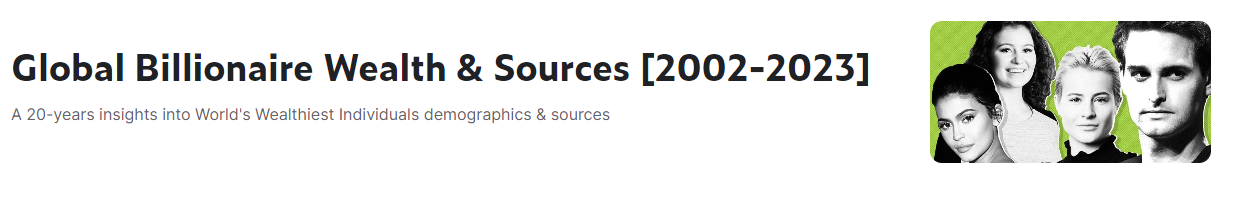

In [ ]:
# Leitura do Dataset
import pandas as pd
import numpy as np

df_bilion = pd.read_csv('https://raw.githubusercontent.com/pabloxD13/tecprog1_trabalho_final/main/billionaire_list_20yrs.csv')

In [ ]:
df_bilion.head(5)

,Unnamed: 0,name,last_name,age,gender,time,permanent_country,company,main_industry,wealth_source_details,industry,state,headquarters,countries,annual_income,daily_income,birth_year,name_cleaned
0,675,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,261928,1955,abdulla_bin_ahmad_al_ghurair
1,676,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,399254,1955,abdulla_bin_ahmad_al_ghurair
2,677,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,536021,1955,abdulla_bin_ahmad_al_ghurair
3,678,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,410391,1955,abdulla_bin_ahmad_al_ghurair
4,679,Abdulla bin Ahmad Al Ghurair,Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,NaN,NaN,are,95604000,558904,1955,abdulla_bin_ahmad_al_ghurair


In [ ]:
# Eliminando as colunas Unnamed: 0 (coluna de índice), daily_income (não serão usadas na análise) e name_cleaned

df_bilion = df_bilion.drop([ 'Unnamed: 0', 'daily_income', 'name_cleaned', 'last_name'], axis = 1)

In [ ]:
percentual_faltantes = df_bilion.isna().sum()/len(df_bilion)*100
print(f'{percentual_faltantes}')

name                      0.000000
age                       0.000000
gender                    3.374871
time                      0.000000
permanent_country        13.534392
company                   7.236732
main_industry             0.000000
wealth_source_details     3.099592
industry                  0.013906
state                    54.822927
headquarters             62.069592
countries                 0.000000
annual_income             0.000000
birth_year                0.000000
dtype: float64


In [ ]:
# As colunas state e headquartes tem muitos dados faltantes pois são preenchidas apenas para empresas americanas, 
# para melhorarmos nossa análise iremos eliminar essas colunas.
df_bilion = df_bilion.drop(['state', 'headquarters'], axis = 1)

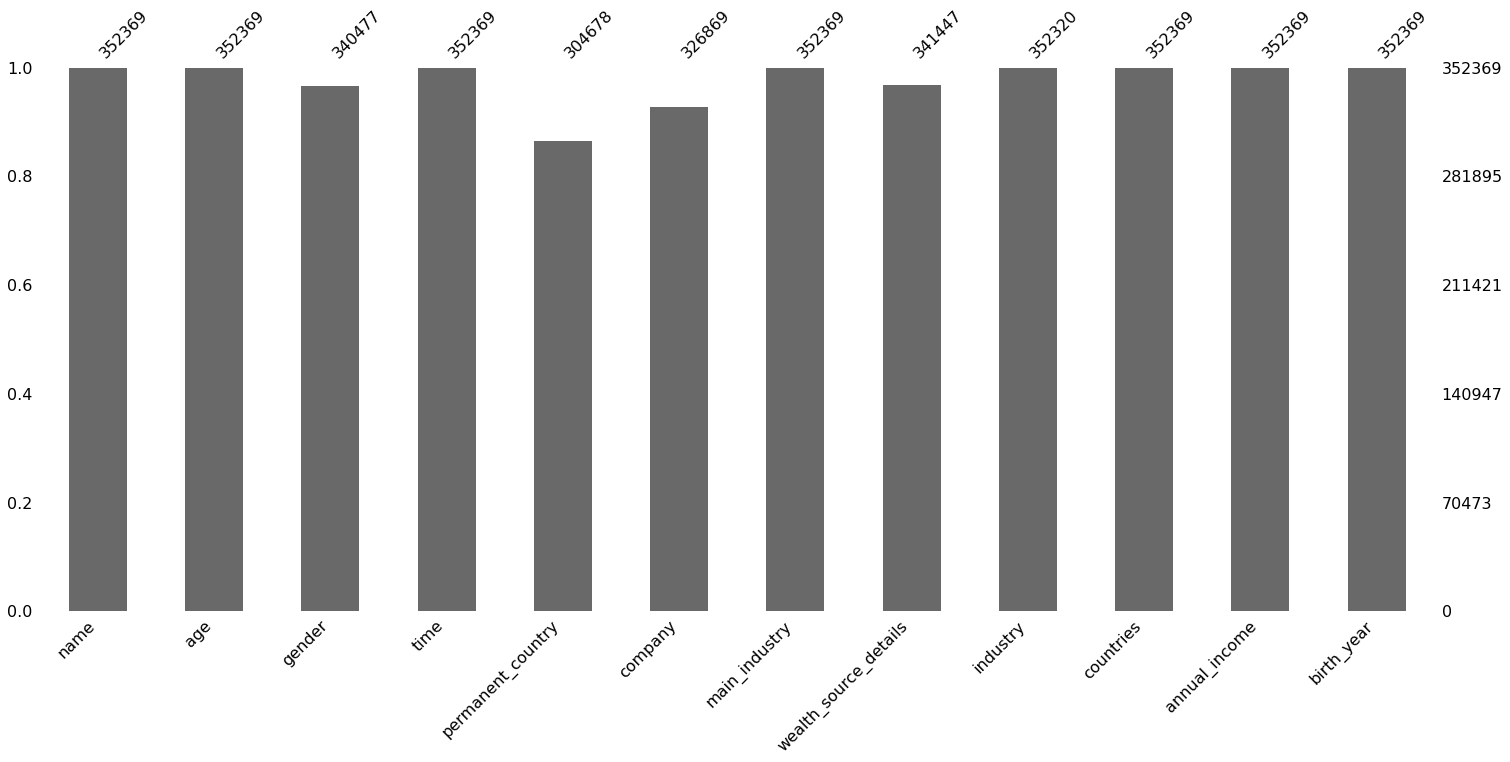

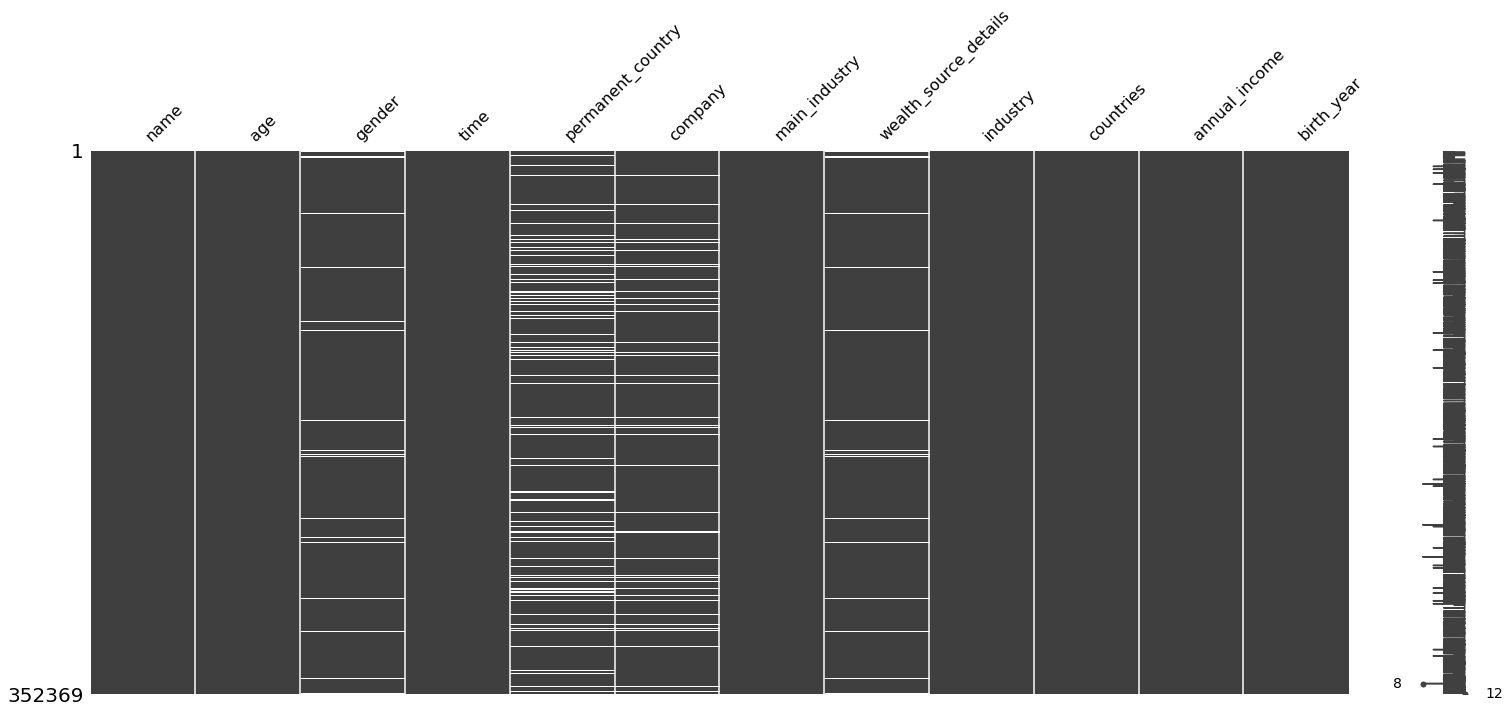

In [ ]:
# Usando biblioteca missingno para plotar os valores faltantes
import missingno as msno
msno.bar(df_bilion)
msno.matrix(df_bilion)

In [ ]:
df_bilion.head(5)

,name,age,gender,time,permanent_country,company,main_industry,wealth_source_details,industry,countries,annual_income,birth_year
0,Abdulla bin Ahmad Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,95604000,1955
1,Abdulla bin Ahmad Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,95604000,1955
2,Abdulla bin Ahmad Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,95604000,1955
3,Abdulla bin Ahmad Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,95604000,1955
4,Abdulla bin Ahmad Al Ghurair,67,M,2013,United Arab Emirates-Dubai,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,95604000,1955


In [ ]:
# Iremos então remover os valores duplicados, mantendo apenas o primeiro valor
df_bilion = df_bilion.drop_duplicates(keep = 'first')

In [ ]:
# Separando os países de residência de cada bilionário criando a coluna country
df_bilion['country'] = df_bilion['permanent_country'].str.split('-', expand=True)[0]
df_bilion = df_bilion.drop(['permanent_country'], axis=1)
df_bilion.head(5)

,name,age,gender,time,company,main_industry,wealth_source_details,industry,countries,annual_income,birth_year,country
0,Abdulla bin Ahmad Al Ghurair,67,M,2013,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,95604000,1955,United Arab Emirates
10,Abdulla bin Ahmad Al Ghurair,67,M,2014,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,145728000,1955,United Arab Emirates
20,Abdulla bin Ahmad Al Ghurair,67,M,2015,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,195647999,1955,United Arab Emirates
30,Abdulla bin Ahmad Al Ghurair,67,M,2016,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,149793000,1955,United Arab Emirates
40,Abdulla bin Ahmad Al Ghurair,67,M,2017,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,204000000,1955,United Arab Emirates


In [ ]:
df_bilion.isna().sum()

name                        0
age                         0
gender                   2804
time                        0
company                  3536
main_industry               0
wealth_source_details    2712
industry                   29
countries                   0
annual_income               0
birth_year                  0
country                  5529
dtype: int64

In [ ]:
# Entendendo a coluna genero
df_bilion.groupby('gender').count()

,name,age,time,company,main_industry,wealth_source_details,industry,countries,annual_income,birth_year,country
gender,,,,,,,,,,,
F,2914,2914,2914,2602,2914,2913,2914,2914,2914,2914,2364
M,25392,25392,25392,22171,25392,25371,25365,25392,25392,25392,20465
M;F,11,11,11,11,11,11,11,11,11,11,0


Durante nossa análise de dados percebemos que existiam dois bilionários com o mesmo nome e de gêneros diferentes, foi então adicionado um M para que fosse diferenciado da outra.

In [ ]:
df_bilion[df_bilion['name'] == 'Wang Yanqing']

,name,age,gender,time,company,main_industry,wealth_source_details,industry,countries,annual_income,birth_year,country
333153,Wang Yanqing,56,M,2018,Guangwei Composites,Manufacturing,electrical equipment,Manufacturing;Chemicals;Chemical,chn,48705000,1966,China
333158,Wang Yanqing,56,M,2019,Guangwei Composites,Manufacturing,electrical equipment,Manufacturing;Chemicals;Chemical,chn,56100000,1966,China
333163,Wang Yanqing,56,M,2020,Guangwei Composites,Manufacturing,electrical equipment,Manufacturing;Chemicals;Chemical,chn,63273000,1966,China
333168,Wang Yanqing,56,M,2021,Guangwei Composites,Manufacturing,electrical equipment,Manufacturing;Chemicals;Chemical,chn,110880000,1966,China
333173,Wang Yanqing,56,M,2022,Guangwei Composites,Manufacturing,electrical equipment,Manufacturing;Chemicals;Chemical,chn,131580000,1966,China
333178,Wang Yanqing,75,F,2020,Lead,Manufacturing,carbon fiber products,Manufacturing;Equipments;TMT,chn,27510000,1947,China
333181,Wang Yanqing,75,F,2021,Lead,Manufacturing,carbon fiber products,Manufacturing;Equipments;TMT,chn,44880000,1947,China
333184,Wang Yanqing,75,F,2022,Lead,Manufacturing,carbon fiber products,Manufacturing;Equipments;TMT,chn,43860000,1947,China


In [ ]:
df_bilion.loc[(df_bilion['name'] == 'Wang Yanqing') & (df_bilion['gender'] == 'M'), 'name'] = 'Wang Yanqing M'


In [ ]:
# Alguns dados faltantes da coluna country serão preenchidos através da coluna countries para os países que estão preenchidos como usa

country = 'usa'
filtered_df = df_bilion.loc[df_bilion['countries'] == country]
filtered_df

,name,age,gender,time,company,main_industry,wealth_source_details,industry,countries,annual_income,birth_year,country
197,Andrew & Peggy Cherng,74,F,2013,Chain Panda,Food & Beverage,restaurants; Restaurants; Panda Restaurant Group,Food & Beverage; Food and Beverage;Hospitality,usa,61680000,1948,NaN
207,Andrew & Peggy Cherng,74,F,2014,Chain Panda,Food & Beverage,restaurants; Restaurants; Panda Restaurant Group,Food & Beverage; Food and Beverage;Hospitality,usa,81972000,1948,NaN
217,Andrew & Peggy Cherng,74,F,2015,Chain Panda,Food & Beverage,restaurants; Restaurants; Panda Restaurant Group,Food & Beverage; Food and Beverage;Hospitality,usa,91709999,1948,NaN
227,Andrew & Peggy Cherng,74,F,2016,Chain Panda,Food & Beverage,restaurants; Restaurants; Panda Restaurant Group,Food & Beverage; Food and Beverage;Hospitality,usa,82538999,1948,NaN
237,Andrew & Peggy Cherng,74,F,2017,Chain Panda,Food & Beverage,restaurants; Restaurants; Panda Restaurant Group,Food & Beverage; Food and Beverage;Hospitality,usa,93000000,1948,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
352050,Zygi Wilf,72,NaN,2018,Minnesota Vikings;Garden Homes,Sports,NaN,Sports;Real Estate,usa,68760000,1950,United States
352056,Zygi Wilf,72,NaN,2019,Minnesota Vikings;Garden Homes,Sports,NaN,Sports;Real Estate,usa,67320000,1950,United States
352062,Zygi Wilf,72,NaN,2020,Minnesota Vikings;Garden Homes,Sports,NaN,Sports;Real Estate,usa,74277000,1950,United States
352068,Zygi Wilf,72,NaN,2021,Minnesota Vikings;Garden Homes,Sports,NaN,Sports;Real Estate,usa,79200000,1950,United States


In [ ]:
df_bilion

,name,age,gender,time,company,main_industry,wealth_source_details,industry,countries,annual_income,birth_year,country
0,Abdulla bin Ahmad Al Ghurair,67,M,2013,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,95604000,1955,United Arab Emirates
10,Abdulla bin Ahmad Al Ghurair,67,M,2014,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,145728000,1955,United Arab Emirates
20,Abdulla bin Ahmad Al Ghurair,67,M,2015,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,195647999,1955,United Arab Emirates
30,Abdulla bin Ahmad Al Ghurair,67,M,2016,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,149793000,1955,United Arab Emirates
40,Abdulla bin Ahmad Al Ghurair,67,M,2017,Mashreq Bank,Diversified,diversified,Diversified;Banking,are,204000000,1955,United Arab Emirates
...,...,...,...,...,...,...,...,...,...,...,...,...
352284,Zygmunt Solorz-Zak,65,M,2018,Cyfrowy Polsat,Media & Entertainment,TV broadcasting; TV station,Media & Entertainment; Media;Media;Entertainment,pol,80220000,1957,Poland
352301,Zygmunt Solorz-Zak,65,M,2019,Cyfrowy Polsat,Media & Entertainment,TV broadcasting; TV station,Media & Entertainment; Media;Media;Entertainment,pol,75735000,1957,Poland
352318,Zygmunt Solorz-Zak,65,M,2020,Cyfrowy Polsat,Media & Entertainment,TV broadcasting; TV station,Media & Entertainment; Media;Media;Entertainment,pol,66024000,1957,Poland
352335,Zygmunt Solorz-Zak,65,M,2021,Cyfrowy Polsat,Media & Entertainment,TV broadcasting; TV station,Media & Entertainment; Media;Media;Entertainment,pol,84480000,1957,Poland


In [ ]:
df_bilion.groupby('country').count().tail(10)

,name,age,gender,time,company,main_industry,wealth_source_details,industry,countries,annual_income,birth_year
country,,,,,,,,,,,
USA,3,3,3,3,3,3,3,3,3,3,3
Ukraine,59,59,59,59,59,59,59,59,59,59,59
United Arab Emirates,129,129,120,129,129,129,120,129,129,129,129
United Kingdom,1049,1049,932,1049,1049,1049,934,1049,1049,1049,1049
United Kingdom,1,1,0,1,1,1,0,1,1,1,1
United States,7197,7197,7035,7197,7197,7197,7035,7197,7197,7197,7197
United States,6,6,0,6,6,6,0,6,6,6,6
United StatesNew Jersey,8,8,8,8,8,8,8,8,8,8,8
Venezuela,28,28,28,28,28,28,28,28,28,28,28


In [ ]:
# Existe duplicidade no nomes dos países na coluna country
df_bilion.loc[df_bilion['country'] == 'USA', 'country'] = 'United States'
df_bilion.loc[df_bilion['country'] == 'United StatesNew Jersey', 'country'] = 'United States'

In [ ]:
df_bilion.groupby('country').count().tail(10)

,name,age,gender,time,company,main_industry,wealth_source_details,industry,annual_income,birth_year,Range
country,,,,,,,,,,,
Thailand,190,190,190,190,190,190,190,190,190,190,190
Turkey,384,384,384,384,384,384,384,384,384,384,384
UK,90,90,90,90,90,90,90,90,90,90,90
USA,3,3,3,3,3,3,3,3,3,3,3
Ukraine,59,59,59,59,59,59,59,59,59,59,59
United Arab Emirates,120,120,120,120,120,120,120,120,120,120,120
United Kingdom,932,932,932,932,932,932,932,932,932,932,932
United States,7670,7670,7670,7670,7670,7670,7670,7670,7670,7670,7670
Venezuela,28,28,28,28,28,28,28,28,28,28,28


In [ ]:
# Serão excluídas as demais linhas com NaN
df_bilion.dropna(inplace=True)

In [ ]:
# Excluindo a coluna countries pois não será usada na análise
df_bilion = df_bilion.drop(['countries'], axis=1)

In [ ]:
# Será criada uma nova coluna onde são filtradas as pessoas pela sua renda anual, de menos que 50 mi, entre 50 mi e 1 bi e mais que 1 bi
df_bilion[['name', 'time','annual_income']]
df_bilion['Range'] = ['< 50mi' if x <= 5*10**7 else 'between 50m and 1bi' if (x > 5*10**7) and (x <= 1*10**9) else '> 1bi' for x in df_bilion['annual_income']]

In [ ]:
df_bilion.groupby('Range')['name'].count()

Range
< 50mi                  7465
> 1bi                    231
between 50m and 1bi    15129
Name: name, dtype: int64

In [ ]:
df_bilion.head(5)

,name,age,gender,time,company,main_industry,wealth_source_details,industry,annual_income,birth_year,country,Range
0,Abdulla bin Ahmad Al Ghurair,67,M,2013,Mashreq Bank,Diversified,diversified,Diversified;Banking,95604000,1955,United Arab Emirates,between 50m and 1bi
10,Abdulla bin Ahmad Al Ghurair,67,M,2014,Mashreq Bank,Diversified,diversified,Diversified;Banking,145728000,1955,United Arab Emirates,between 50m and 1bi
20,Abdulla bin Ahmad Al Ghurair,67,M,2015,Mashreq Bank,Diversified,diversified,Diversified;Banking,195647999,1955,United Arab Emirates,between 50m and 1bi
30,Abdulla bin Ahmad Al Ghurair,67,M,2016,Mashreq Bank,Diversified,diversified,Diversified;Banking,149793000,1955,United Arab Emirates,between 50m and 1bi
40,Abdulla bin Ahmad Al Ghurair,67,M,2017,Mashreq Bank,Diversified,diversified,Diversified;Banking,204000000,1955,United Arab Emirates,between 50m and 1bi


In [ ]:
df_bilion.to_csv('df_bilion.csv')

# Importando as bibliotecas e iniciando a visualização de dados

In [ ]:
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go

## Plotando o crescimento anual dos 5 países com maior annual income



In [ ]:
# Selecionando os 5 países com maior renda em 2022 e criando um dataframe
country_2022 = df_bilion[df_bilion['time'] == 2022]
top_5 = list(country_2022.groupby('country')['annual_income'].sum().sort_values(ascending = False).index[:5])
top_countries = df_bilion[df_bilion['country'].isin(top_5)]

In [ ]:
top_countries.groupby('country')['annual_income'].sum().sort_values(ascending = False)

country
United States    1129457153165
China             340995253513
Germany           129813589377
India             109610972921
France             82450859956
Name: annual_income, dtype: int64

In [ ]:
# Fazendo a agregação do annual_income
top_countries_ag = top_countries.groupby(['country', 'time'])['annual_income'].agg({'sum'}).reset_index()

In [ ]:
top_countries_ag.rename(columns={"sum": "annual_income"}, inplace=True)

In [ ]:
top_countries_ag

,country,time,annual_income
0,China,2002,1322025600
1,China,2003,911671196
2,China,2004,1336383600
3,China,2005,1401371997
4,China,2006,1928837995
...,...,...,...
100,United States,2018,84213810000
101,United States,2019,83948040000
102,United States,2020,77085771000
103,United States,2021,109134960000


In [ ]:
fig = px.line(top_countries_ag, x="time", y="annual_income", color='country', 
              markers=True, width=1200, height=600)
fig.update_layout(title={"text":"Top 5 countries and the evolution of their annual income by year",
                         "x":0.5, 
                         "xanchor":"center", 
                         "yanchor":"top"})
fig.show()

Principais conclusões a partir dos gráficos.

*   Crise de 2008 afetou os países. Estados unidos teve uma perda de aproximadamente 11 bilhões de dólares em renda anual;
*   Devido a pandemia foi possível observar que os bilionários ficaram mais ricos entre 2020 e 2022. Fonte: https://www.cnnbrasil.com.br/business/1-mais-rico-acumulou-duas-vezes-mais-riqueza-do-que-resto-do-mundo-em-2-anos/#:~:text=Sua%20fortuna%20aumentou%20US%24%2026,ricos%20acelerou%20durante%20a%20pandemia;
*   A renda anual dos bilionários Chineses cresceu em maior proporção que dos outros países.



## Plotando o crescimento por gênero

In [ ]:
# Agregando os valores por gênero ao longo da linha do tempo
gender_ag = df_bilion.groupby(['gender', 'time'])['annual_income'].agg({'sum'}).reset_index()
gender_ag.rename(columns={"sum": "annual_income"}, inplace=True)
gender_ag.head(3)

,gender,time,annual_income
0,F,2002,2787645000
1,F,2003,2801009998
2,F,2004,3732210000


In [ ]:
gender = pd.pivot_table(df_bilion, index = 'time', columns = 'gender', 
                        values = 'annual_income', aggfunc = {'count'})
gender.columns = ['Female_Count', 'Male_Count']

In [ ]:
# Realizando a análise através do crescimento percentual por gênero
gender['Female_percent'] = gender['Female_Count']/gender.loc[2002, 'Female_Count']*100
gender['Male_percent'] = gender['Male_Count']/gender.loc[2002, 'Male_Count']*100
gender = gender.reset_index()

In [ ]:
gender.head(5)

,time,Female_Count,Male_Count,Female_percent,Male_percent
0,2002,21,228,100.000000,100.000000
1,2003,23,225,109.523810,98.684211
2,2004,31,288,147.619048,126.315789
3,2005,39,358,185.714286,157.017544
4,2006,45,429,214.285714,188.157895


In [ ]:
# Criando o primeiro gráfico
fig1 = px.line(gender_ag, x="time", y="annual_income", color='gender', markers=True, width=1000, height=500 )
fig1.update_layout(title_text = 'Annual Income by Gender', title_x = 0.5)

# Criando o segundo gráfico
fig2 = px.line(gender, x="time", y=["Female_percent", "Male_percent"], markers=True, width=1000, height=500)
fig2.update_layout(title_text = 'Percentage of Male and Female Wealth Owners', title_x = 0.5)

# Criando o subplot
fig = sp.make_subplots(rows=1, cols=2)
fig.add_trace(fig1['data'][0], 1, 1)
fig.add_trace(fig1['data'][1], 1, 1)
fig.add_trace(fig2['data'][0], 1, 2)
fig.add_trace(fig2['data'][1], 1, 2)
fig.update_layout(title_text='Annual Income by Gender and Percentage of Male and Female Wealth Owners',
                  title_x=0.5,
                  xaxis=dict(title='Time'),
                  yaxis=dict(title='Annual Income/Percentage'))
fig.show()

Através desses dois gráficos é possível tirar a seguinte conclusão:


*   A renda anual dos homens bilionários aumentou consideravelmente ao longo do tempo (de 30 para 258 bi);
*   Por mais que a renda das mulheres não tivesse aumentado tanto quanto dos homens, o número de mulheres bilionárias em percentual cresceu mais que o dos homens.




## Plotando a distribuição da renda anual por indústria

In [ ]:
top_10_industries = list(df_bilion['main_industry'].value_counts().index[:10])
industry_filter = df_bilion[df_bilion['main_industry'].isin(top_10_industries)]
grouped_indust = pd.pivot_table(industry_filter, index = 'time', columns = 'main_industry', values = 'annual_income', aggfunc = 'sum')
grouped_indust = grouped_indust.T
group_indust = grouped_indust.reset_index(inplace=True)
grouped_indust

time,main_industry,2002,2003,2004,2005,2006,2007,2008,2009,2010,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Diversified,2883909000,2969837994,4237050000,5030297989,6608753977,8517267000,11668833000,5868150000,8653812000,...,13057656000,14223660000,15429596033,14092769938,17451000000,20198250000,19531215000,15053472000,20856000000,22644660000
1,Energy,998739000,1089707997,1384704000,1844093995,2980619990,4079556000,5406126000,3001848000,4474191000,...,8323716000,9804762000,9293279947,6924104955,8631000000,8566350000,8740380000,6671175000,9398400000,9215760000
2,Fashion & Retail,6574029000,5586671992,7107426000,7850471993,8842505969,10973187000,12045462000,8631966000,12682875000,...,20946528000,25931994000,28416343387,25272218895,26568000000,30853185000,29819955000,28181244000,41342400000,38792880000
3,Finance & Investments,5413245600,4856107189,6153999600,7243907988,8705465947,12514959000,17031630000,9878328000,14810325000,...,20340522000,23456136000,25394498850,24517139849,27867000000,29902005000,29303835000,26836005000,36271488000,38951292000
4,Food & Beverage,1576323000,1630724999,1759728000,2119487995,2305697987,2872062000,3273006000,2644800000,4140345000,...,8255868000,9640818000,12839399928,12885254916,14691000000,17616885000,16731825000,15435861000,21582000000,19851810000
5,Healthcare,537474000,372188999,562536000,801779997,931871990,1306413000,1736493000,1464558000,2012895000,...,3020778000,4563108000,6778897453,7618043938,8487000000,9789705000,9494925000,10442796000,17511120000,16088880000
6,Manufacturing,854343000,798095998,1052952000,1596587998,1942541986,2981214000,4316235000,2446440000,4297449000,...,6308322000,8159250000,9128201927,9583694929,11919000000,15135795000,13506075000,13133274000,24229920000,23908860000
7,Media & Entertainment,2739513000,2467190997,3097554000,3140885997,3220439981,4683303000,5106156000,3501054000,4706574000,...,6723120000,8004414000,8588641451,8611568960,9807000000,9829815000,9688470000,8321775000,12872640000,11989260000
8,Real Estate,1271487000,1231676999,1579428000,1955645995,2874413983,4383135000,6279372000,4026708000,5704839000,...,8963646000,9215778000,11462221424,11570744924,14028000000,16754520000,16468155000,13378113000,16513200000,14244180000
9,Technology,6325347000,4504637996,5798448000,6424697991,7605719980,8636652000,9429057000,6135936000,9370599000,...,13298208000,17962190398,22092938902,22319156911,27252000000,32294280000,33424380000,33815292000,56958000000,51548399999


In [ ]:
labels = list(grouped_indust['main_industry'].unique())

In [ ]:
# Iremos criar um plot comparando as 10 principais indústrias e como estão distribuido seus percentuais de bilionários nos anos de 2002 e de 2022

In [ ]:
print(grouped_indust.columns)

Index(['main_industry',            2002,            2003,            2004,
                  2005,            2006,            2007,            2008,
                  2009,            2010,            2011,            2012,
                  2013,            2014,            2015,            2016,
                  2017,            2018,            2019,            2020,
                  2021,            2022],
      dtype='object', name='time')


In [ ]:
# Criando o subplot
fig = sp.make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Wealth Allocation in 2002 in $B',
                                    'Wealth Allocation in 2022 in $B'])

# Criando o gráfico de 2002 
fig.add_trace(go.Pie(labels=labels, values=grouped_indust[2002],
                     name="Wealth Allocation in 2002", ), 1, 1)

# Criando o gráfico de 2022
fig.add_trace(go.Pie(labels=labels, values=grouped_indust[2022],
                     name="Wealth Allocation in 2022"), 1, 2)
fig.update_layout(title_text='Total amount of Income on Industries and their Distribution in 2002 and 2022',
                  title_x = 0.5,
                  legend=dict(orientation="h", x = 0.1), title_pad_b = 10)
fig.update_layout(width=1000, height=500)

fig.update_traces(textposition = 'inside',textinfo='label+percent',
                  insidetextorientation='radial',
                  hovertemplate = 'Dollars: %{value:$.3s}')

Fazendo algumas análises:

*   No ano de 2002 a indúsrtia fashion era a segunda maior responsável pela produção de bilionários com 21,4%;
*   A indústria de Healthcare teve uma alta de 1,75% para 6,51%, a pandemia do COVID 19 pode ter contribuido ativamente para essa alta;
*   Houve crescimento na indústria de manufatura e de alimentos, a população do mundo cresceu em 1,5 bilhões de pessoas, isso pode explicar um aumento nessas áreas também.
